In [1]:
#Data Cleaning

import pandas as pd


#Load the dataset

credit = pd.read_excel("/users/sanghyunryu/desktop/Trainning/DataSetHandling/credit_data.xls")
print(credit)

          ID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0          1                 1                              0.766127   45   
1          2                 0                              0.957151   40   
2          3                 0                              0.658180   38   
3          4                 0                              0.233810   30   
4          5                 0                              0.907239   49   
...      ...               ...                                   ...  ...   
65530  65531                 0                              0.877537   54   
65531  65532                 0                              0.960672   37   
65532  65533                 0                              0.019139   76   
65533  65534                 1                              0.350679   55   
65534  65535                 0                              0.941521   46   

       NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  MonthlyIncome  \


In [2]:
#Check for missing values
print(credit.isnull().any()) #there are two missing values in MontlyIncome and NumberOfDependents

ID                                      False
SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                            True
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                       True
dtype: bool


In [3]:
#check total number of missing values
print(credit.isnull().sum())

ID                                          0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           13001
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       1729
dtype: int64


In [4]:
credit_missing = credit.columns[credit.isnull().any()]
print(credit_missing)

Index(['MonthlyIncome', 'NumberOfDependents'], dtype='object')


In [5]:
# Separate the columns
Missing_columns = credit[['MonthlyIncome','NumberOfDependents']]
print(Missing_columns)

       MonthlyIncome  NumberOfDependents
0             9120.0                 2.0
1             2600.0                 1.0
2             3042.0                 0.0
3             3300.0                 0.0
4            63588.0                 0.0
...              ...                 ...
65530         6166.0                 0.0
65531         6304.0                 2.0
65532         4607.0                 0.0
65533            NaN                 0.0
65534         8000.0                 3.0

[65535 rows x 2 columns]


In [6]:
# Check the average of column
print(Missing_columns.mean())

MonthlyIncome         6609.615811
NumberOfDependents       0.759944
dtype: float64


In [8]:
#Round up the average

print(round(Missing_columns.mean()))

MonthlyIncome         6610.0
NumberOfDependents       1.0
dtype: float64


In [12]:
# MISSING VALUE IMPUTATION
#Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located.

credit_rep = Missing_columns.fillna(round(Missing_columns.mean()))
print(credit_rep.isnull().any())


MonthlyIncome         False
NumberOfDependents    False
dtype: bool


In [13]:
# Put the treated columns in the original dataset
credit[["MonthlyIncome", "NumberOfDependents"]] = credit_rep
print(credit.isnull().any())
# There are no missing values after imputation

ID                                      False
SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                           False
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                      False
dtype: bool


In [16]:
# TO DROP MISSING VALUES

# credit.dropna()

# Remove Duplicates
# sorting by first name 
credit.sort_values("ID", inplace = True)

print(credit)
  
#dropping ALL duplicte values 
credit.drop_duplicates(subset ="ID",keep = False, inplace = True)
# There are no duplicate values in attriblue "ID"
print(credit)

          ID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0          1                 1                              0.766127   45   
1          2                 0                              0.957151   40   
2          3                 0                              0.658180   38   
3          4                 0                              0.233810   30   
4          5                 0                              0.907239   49   
...      ...               ...                                   ...  ...   
65530  65531                 0                              0.877537   54   
65531  65532                 0                              0.960672   37   
65532  65533                 0                              0.019139   76   
65533  65534                 1                              0.350679   55   
65534  65535                 0                              0.941521   46   

       NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  MonthlyIncome  \


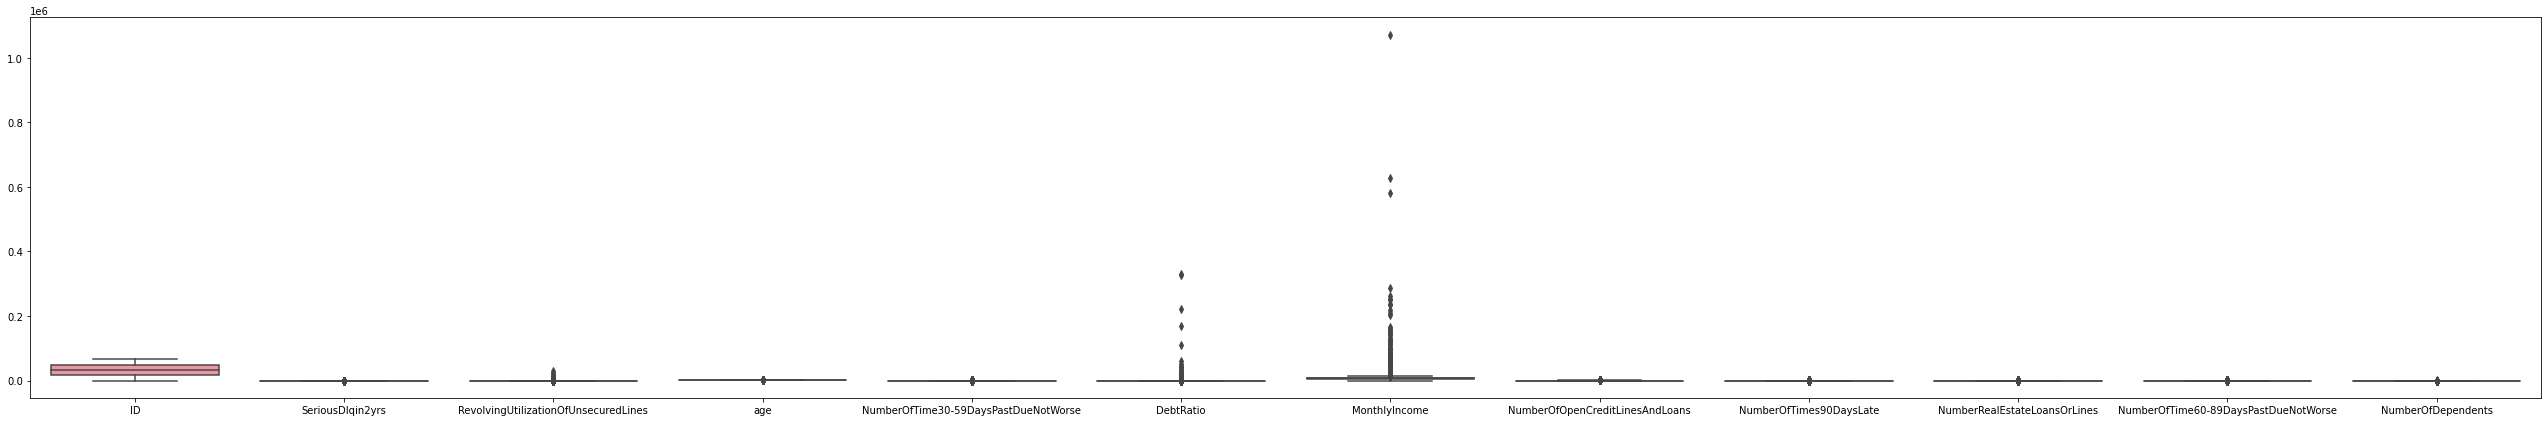

In [28]:
# OutLier Treatment
import matplotlib.pyplot as plt
import seaborn as sns
# Boxplit to check outlier
plt.figure(figsize=(45,7))
sns.boxplot(data=credit)
plt.show()
# DebtRatio , MonthlyIncome have outliers

In [34]:
# TREATMENT OF OUTLIER
# Q1 : .25
# Q3 : .75
# INTERQUARTILE RANGE(IQR) : Q3-Q1

import scipy
from scipy.stats import iqr
import numpy as np

q1 = credit["MonthlyIncome"].quantile(.25)
q3 = credit["MonthlyIncome"].quantile(.75)

print("Iqr:", q3-q1)

Iqr: 3477.0


In [35]:
#get the lower bound and upper bound
Lower_Whisker = q1 - (q3 - q1) * 1.5
print("LW:",Lower_Whisker )

Upper_Whisker = q3 + (q3 - q1) * 1.5
print("UW:",Upper_Whisker )

LW: -1310.5
UW: 12597.5


In [36]:
#Outlier treatment for MonthlyIncome
credit["MonthlyIncome"] = np.where(credit["MonthlyIncome"] < Lower_Whisker, Lower_Whisker, credit["MonthlyIncome"])
credit["MonthlyIncome"] = np.where(credit["MonthlyIncome"] > Upper_Whisker, Upper_Whisker, credit["MonthlyIncome"])

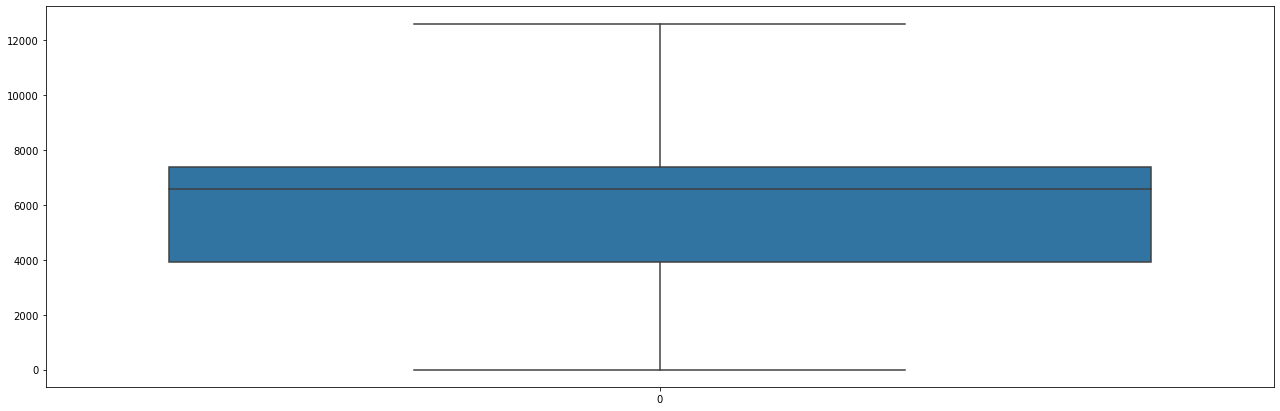

In [37]:
#check the outlier for MontlyIncome
plt.figure(figsize=(22, 7))
sns.boxplot(data=credit["MonthlyIncome"])
plt.show()

In [40]:
#Outlier treatment for DebtRatio

q1 = credit["DebtRatio"].quantile(.25)
q3 = credit["DebtRatio"].quantile(.75)

print("Iqr:", q3-q1)
Lower_Whisker = q1 - (q3 - q1) * 1.5
print("LW:",Lower_Whisker )

Upper_Whisker = q3 + (q3 - q1) * 1.5
print("UW:",Upper_Whisker )
credit["DebtRatio"] = np.where(credit["DebtRatio"] < Lower_Whisker, Lower_Whisker, credit["DebtRatio"])
credit["DebtRatio"] = np.where(credit["DebtRatio"] > Upper_Whisker, Upper_Whisker, credit["DebtRatio"])



Iqr: 0.6950634735
LW: -0.86858860325
UW: 1.91166529075


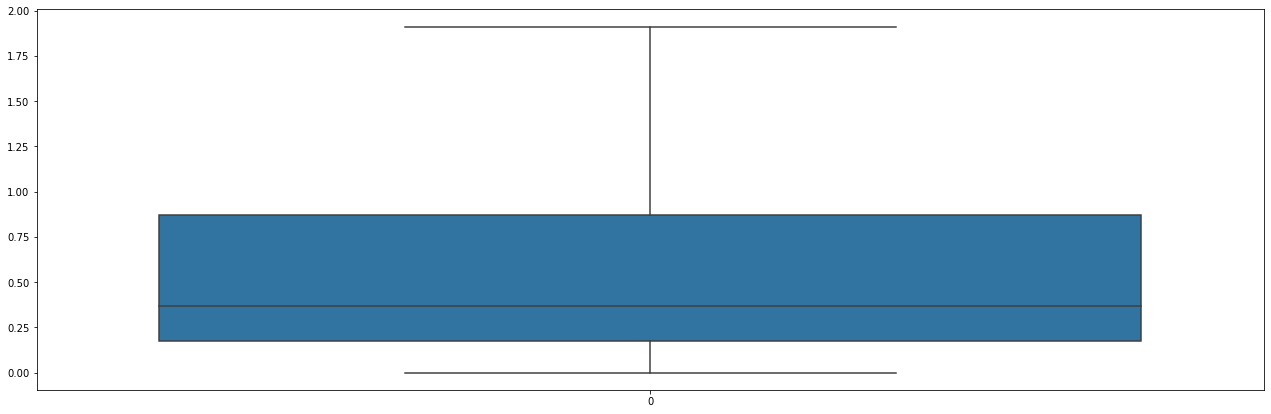

In [41]:
#check the outlier for DebtRatio
plt.figure(figsize=(22, 7))
sns.boxplot(data=credit["DebtRatio"])
plt.show()

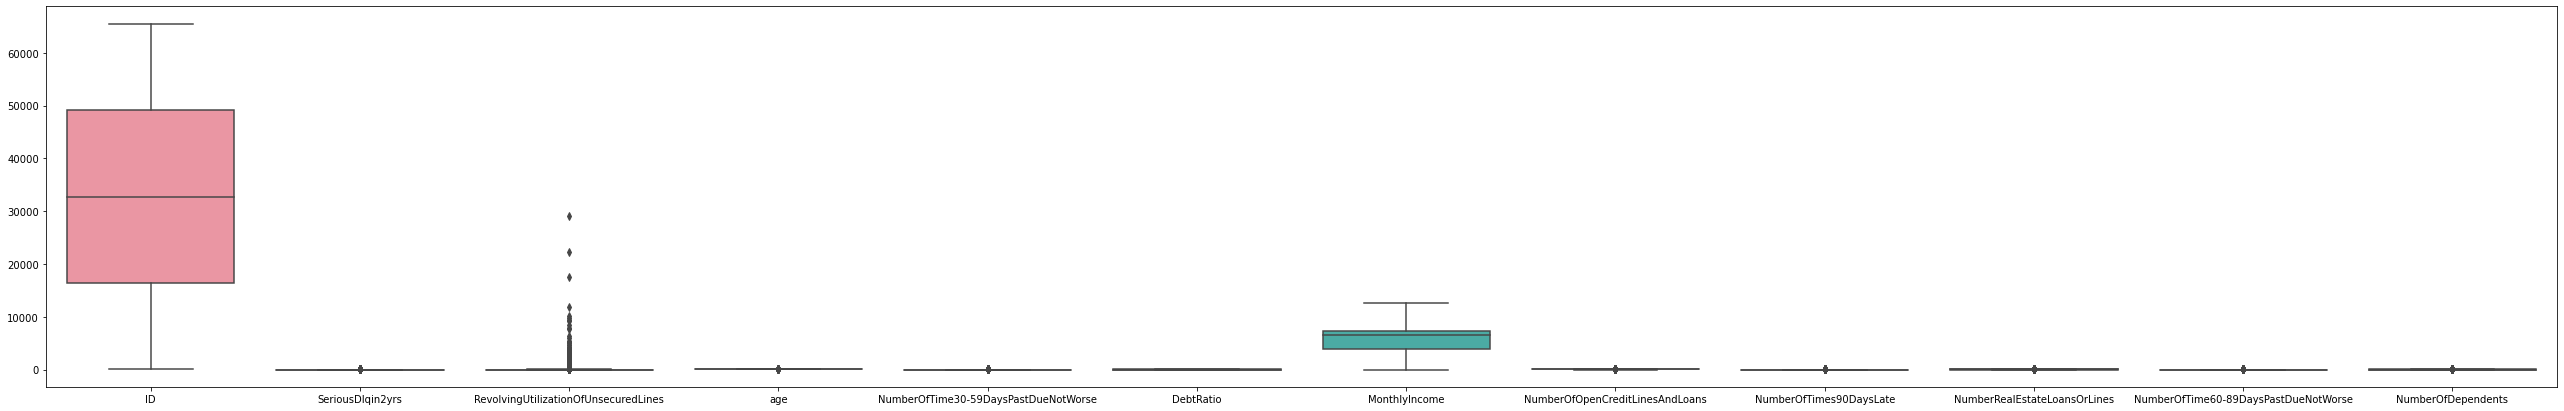

In [42]:
plt.figure(figsize=(45,7))
sns.boxplot(data=credit)
plt.show()

Iqr: 0.5348114249999999
LW: -0.7724140714999997
UW: 1.3668316284999997


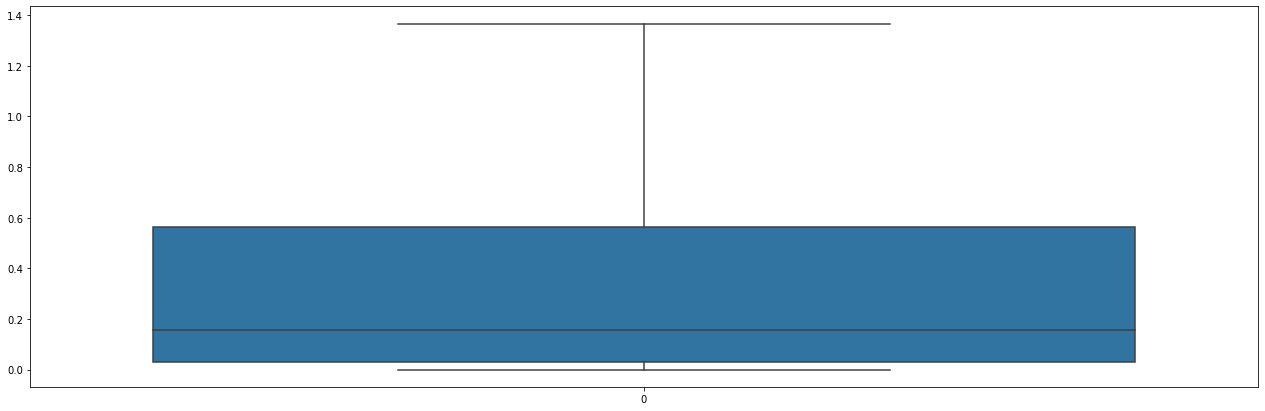

In [43]:
# There was another outlier on RevolvingUtilizationOfUnsecuredLines
#Outlier treatment for RevolvingUtilizationOfUnsecuredLines

q1 = credit["RevolvingUtilizationOfUnsecuredLines"].quantile(.25)
q3 = credit["RevolvingUtilizationOfUnsecuredLines"].quantile(.75)

print("Iqr:", q3-q1)
Lower_Whisker = q1 - (q3 - q1) * 1.5
print("LW:",Lower_Whisker )

Upper_Whisker = q3 + (q3 - q1) * 1.5
print("UW:",Upper_Whisker )
credit["RevolvingUtilizationOfUnsecuredLines"] = np.where(credit["RevolvingUtilizationOfUnsecuredLines"] < Lower_Whisker, Lower_Whisker, credit["RevolvingUtilizationOfUnsecuredLines"])
credit["RevolvingUtilizationOfUnsecuredLines"] = np.where(credit["RevolvingUtilizationOfUnsecuredLines"] > Upper_Whisker, Upper_Whisker, credit["RevolvingUtilizationOfUnsecuredLines"])

#check the outlier for RevolvingUtilizationOfUnsecuredLines
plt.figure(figsize=(22, 7))
sns.boxplot(data=credit["RevolvingUtilizationOfUnsecuredLines"])
plt.show()

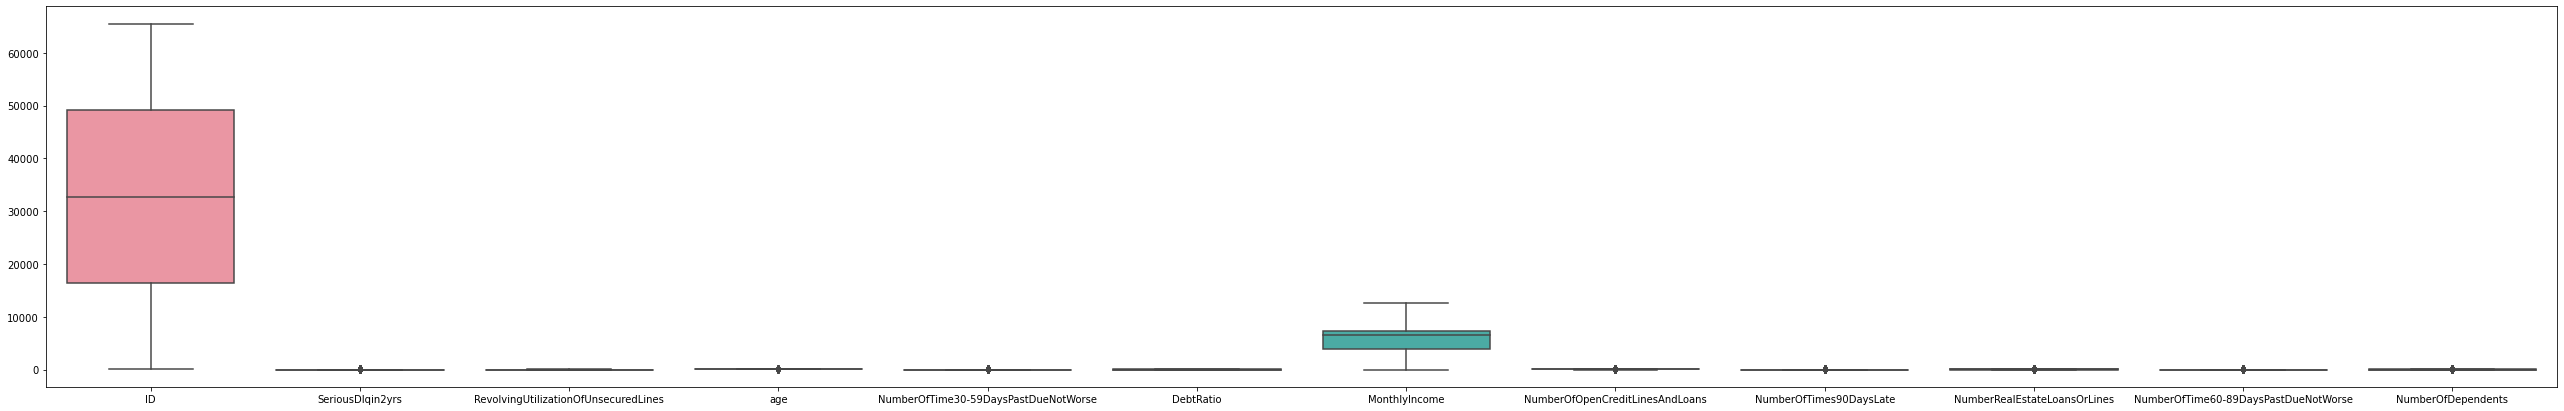

In [44]:
plt.figure(figsize=(45,7))
sns.boxplot(data=credit)
plt.show()

In [ ]:
#it seems there is no more outlier